# Disney TV show and Movies Analysis

## Import libraries and load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# To hide all the warning messages

import warnings
warnings.filterwarnings('ignore')

In [4]:
disney = pd.read_csv('disney_plus_titles.csv')

In [5]:
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [6]:
disney.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [7]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [8]:
disney['show_id']

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
1445    s1446
1446    s1447
1447    s1448
1448    s1449
1449    s1450
Name: show_id, Length: 1450, dtype: object

##### We don't need the id column, since we have the index, so drop it

In [9]:
disney.drop(columns='show_id', inplace=True)

In [10]:
disney.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### Let's see how many movies and how many tv shows

In [11]:
disney['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

#### Let's separate the tv shows and movies in separate dataframes

In [12]:
tv_shows = disney[disney['type'] == 'TV Show']
movies = disney[disney['type'] == 'Movie']

In [13]:
tv_shows.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,TV Show,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."


In [14]:
movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...


##### We can drop type from both dataframes now

In [15]:
tv_shows.drop(columns='type', inplace=True)
movies.drop(columns='type', inplace=True)

In [16]:
tv_shows.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."


In [17]:
movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...


#### Let's first look at the tv shows

In [18]:
tv_shows['duration'].value_counts()

1 Season      219
2 Seasons      82
3 Seasons      45
4 Seasons      24
5 Seasons      11
7 Seasons       5
6 Seasons       3
10 Seasons      2
9 Seasons       2
8 Seasons       2
32 Seasons      1
16 Seasons      1
19 Seasons      1
Name: duration, dtype: int64

A more appropriate name for 'duration' would be 'seasons'. So, rename and make this column int type

In [19]:
tv_shows.rename(
    columns={'duration': 'seasons'}, inplace=True, errors='raise'
    )

In [20]:
# Only keep the number in seasons column

tv_shows['seasons'] = tv_shows['seasons'].apply(lambda x: x.split(" ")[0])

In [21]:
# Now convert to int

tv_shows['seasons'] = tv_shows['seasons'].astype('int16')

In [22]:
tv_shows.head()

,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
4,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."


##### Let's create release month and day columns

But first let's check for NaN values and get rid of those.
I understood that there's NaN values because I ran into errors while working with the 'date_added' column.

In [23]:
tv_shows.isna()

,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
4,False,True,False,True,False,False,True,False,False,False
6,False,True,False,True,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False
13,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1417,False,True,False,False,False,False,False,False,False,False
1434,False,True,False,False,False,False,False,False,False,False
1439,False,True,False,False,True,False,False,False,False,False
1440,False,True,False,False,True,False,False,False,False,False


In [24]:
tv_shows['director'].isna().value_counts()

True    398
Name: director, dtype: int64

Every value in director column is NaN, so drop the column

In [25]:
tv_shows.drop(columns='director', inplace=True)

Now let's check date_added column for NaN

In [26]:
tv_shows[tv_shows['date_added'].isna()]

,title,cast,country,date_added,release_year,rating,seasons,listed_in,description
1439,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,Imagination Movers,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


Since only 3 rows have NaN in date_added column, drop those rows

In [27]:
# These are also the last 3 rows of the dataframe
tv_shows.tail()

,title,cast,country,date_added,release_year,rating,seasons,listed_in,description
1417,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,"November 12, 2019",2000,TV-Y7,4,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1434,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,"October 1, 2019",1996,TV-G,3,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
1439,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,Imagination Movers,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [28]:
tv_shows.drop(tv_shows.index[[395, 396, 397]], inplace=True) # Since tv_shows has 398 columns

##### Now we are set to proceed our work

In [29]:
def add_month(date):
    return date.split(" ")[0]

def add_day(date):
    return date.split(" ")[1].split(",")[0]

tv_shows['month'] = tv_shows['date_added'].apply(lambda x: add_month(x))
tv_shows['day'] = tv_shows['date_added'].apply(lambda x: add_day(x))

In [30]:
tv_shows.head()

,title,cast,country,date_added,release_year,rating,seasons,listed_in,description,month,day
4,The Beatles: Get Back,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,November,25
6,Hawkeye,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,November,24
7,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,November,24
8,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,November,24
13,"Dr. Oakley, Yukon Vet","Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e...",November,17


<AxesSubplot:xlabel='release_year'>

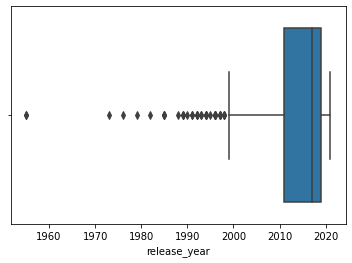

In [31]:
sns.boxplot(tv_shows['release_year'])

We can see that 50% of the tv shows were first released from about 2017 till now

##### Now let's see in which month there are most releases

Text(0, 0.5, 'Tv show releases')

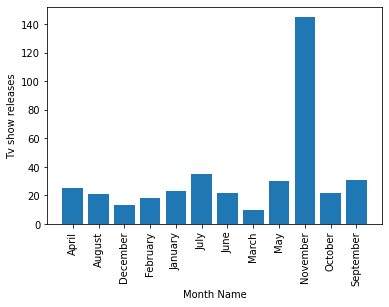

In [32]:
# The below code will show the months in lexicographical order, 
# not in order of the number of month of the year


months = tv_shows['month'].unique()
months = np.sort(months)

# Use matplotlib to plot 
plt.bar(months, tv_shows.groupby(['month']).count()['seasons'])
plt.xticks(months)
plt.xlabel('Month Name')
plt.xticks(rotation=90)
plt.ylabel('Tv show releases')

By far the most releases happen in November